In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print(tf.__version__)

2.16.2


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

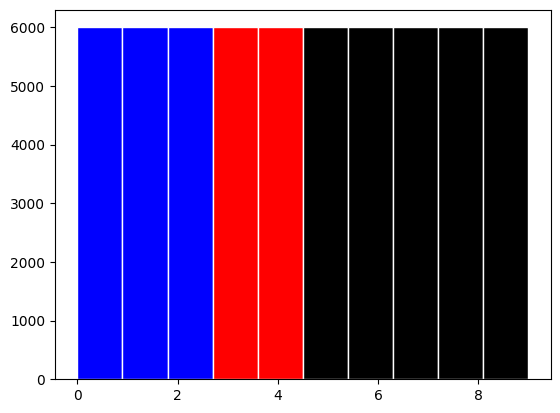

In [9]:

fig, ax = plt.subplots()
data = y_train

N, bins, patches = ax.hist(data, edgecolor='white', linewidth=1)

for i in range(0,3):
    patches[i].set_facecolor('b')
for i in range(3,5):    
    patches[i].set_facecolor('r')
for i in range(5, len(patches)):
    patches[i].set_facecolor('black')

plt.show()

In [11]:
print(np.isnan(y_train).any())

False


In [15]:
class_names = [
    "tshirt/top",
    "trouser",
    "pullover",
    "dress",
    "Coat",
    "sandal",
    "shirt",
    "sneaker",
    "bag",
    "boots"
]
x_train.shape

(60000, 28, 28)

(60000,)

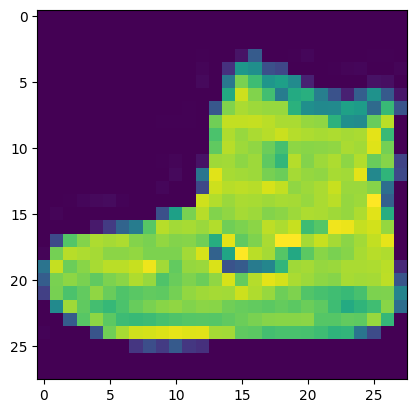

In [23]:
plt.imshow(x_train[0,:,:])
y_train.shape

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

c:\Users\anomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [53]:
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8376 - loss: 0.4759
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8389 - loss: 0.4687
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8420 - loss: 0.4597
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8388 - loss: 0.4713
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8462 - loss: 0.4516
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8403 - loss: 0.4748
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8434 - loss: 0.4574
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8455 - loss: 0.4518
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8425 - loss: 0.4580
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8437 - loss: 0.4533
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8450 - loss: 0.4585
Epoch 12/100
1875/1

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


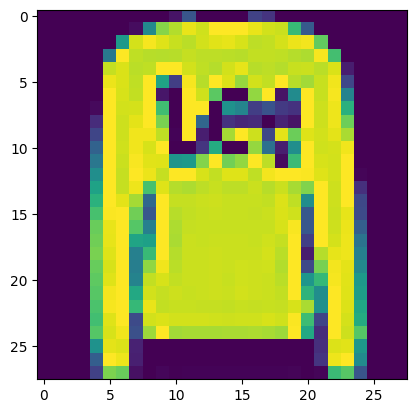

In [40]:
plt.imshow(x_test[1])
prediction = model.predict(x_test)

2
2


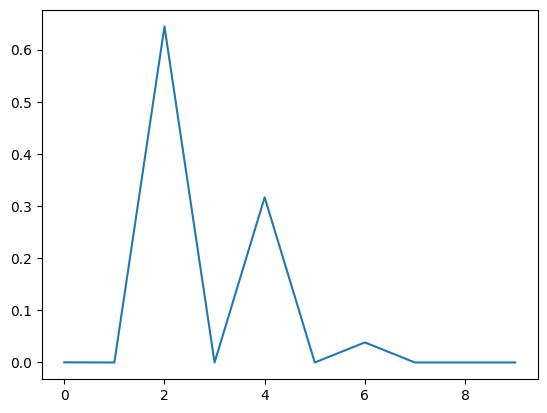

In [54]:
plt.plot(prediction[1])
def maxer(list)->int:
    maxi = 0
    maxval = -1
    for i in range(len(list)):
        if(list[i]>maxval):
            maxi = i
            maxval = list[i]
    return maxi
print(maxer(prediction[1]))
print(y_test[1])

In [55]:
accuracy = 0
for i in range(len(x_test)):
    if(maxer(prediction[i]) == y_test[i]):
        accuracy += 1

print(100*accuracy/len(x_test),"%")

79.66 %
